# 包导入

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 数据导入

In [16]:
stone  = pd.read_excel("stone.xlsx")
print("护石:")
print(stone.head())
print("基本信息: ")
print(stone.info())

护石:
   等级      一技能  Lv    二技能  Lv.1   孔  value
0   7  火属性攻击强化   1     不屈   1.0  21      0
1   6     昏厥耐性   2    击晕术   1.0  11      0
2   5      植生学   1  毒属性强化   2.0  11      0
3   6     风压耐性   1    击晕术   1.0  11      0
4   7       逆袭   2     利刃   1.0   1      1
基本信息: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   等级      2700 non-null   int64  
 1   一技能     2700 non-null   object 
 2   Lv      2700 non-null   int64  
 3   二技能     2419 non-null   object 
 4   Lv.1    2419 non-null   float64
 5   孔       2700 non-null   int64  
 6   value   2700 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 147.8+ KB
None


In [17]:
skill = pd.read_excel("skill.xlsx")
print("技能:")
print(skill.head())
print(skill.info())

技能:
  LookUpName  MaxLevel
0         攻击         7
1        挑战者         5
2         无伤         3
3         怨恨         5
4       死里逃生         3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LookUpName  113 non-null    object
 1   MaxLevel    113 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB
None


# 数据预处理

In [18]:
# 处理缺失值
stone.fillna({"二技能":"无","Lv.1":0},inplace=True)

#处理技能,将技能名称用数字替换
skillArray = skill["LookUpName"].values
stone['一技能'].replace(skillArray,list(range(1,114)),inplace=True)
stone['二技能'].replace(skillArray,list(range(1,114)),inplace=True)
stone.head(10)

,等级,一技能,Lv,二技能,Lv.1,孔,value
0,7,13,1,93,1.0,21,0
1,6,77,2,41,1.0,11,0
2,5,80,1,18,2.0,11,0
3,6,63,1,41,1.0,11,0
4,7,107,2,23,1.0,1,1
5,4,40,3,16,1.0,0,0
6,6,68,2,70,1.0,21,0
7,5,71,1,13,2.0,11,0
8,5,18,2,54,1.0,1,0
9,7,77,1,63,1.0,21,0


# 数据分析

查看可用护石的占比

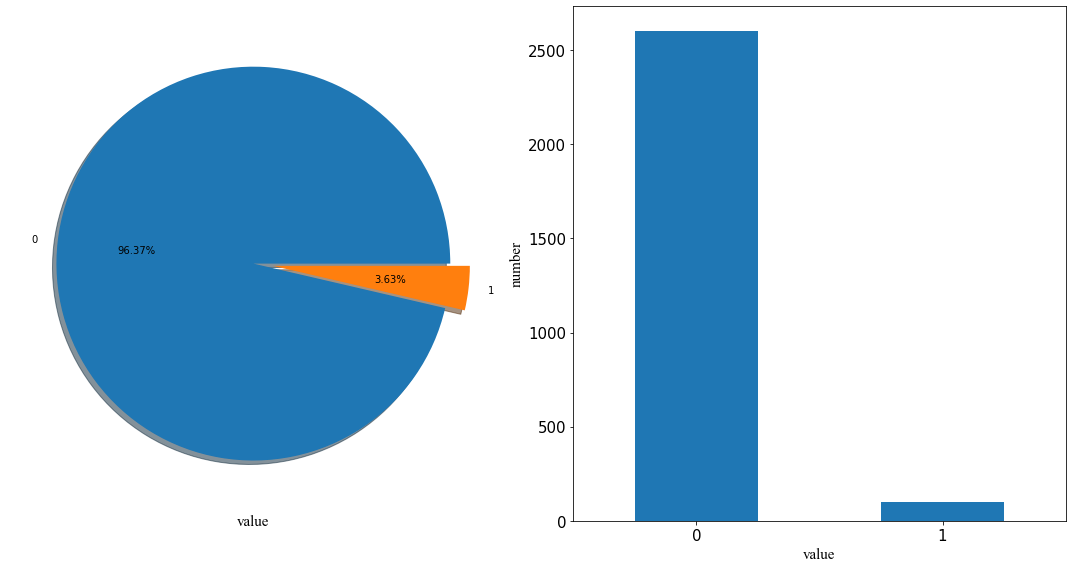

In [19]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 15,
}

fig,ax=plt.subplots(1,2,figsize=(15,8))
stone['value'].value_counts().plot.pie(ax=ax[0],shadow=True,explode=[0,0.1],autopct='%.2f%%')
ax[0].set_ylabel('')
ax[0].set_xlabel('value',font1)

stone['value'].value_counts().plot.bar(ax=ax[1])
ax[1].set_ylabel('number',font1)
ax[1].set_xlabel('value',font1)
#设置相关信息
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

等级与value的关系

7    839
5    775
6    578
4    353
3    155
Name: 等级, dtype: int64


/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27599 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 31561 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32423 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-p

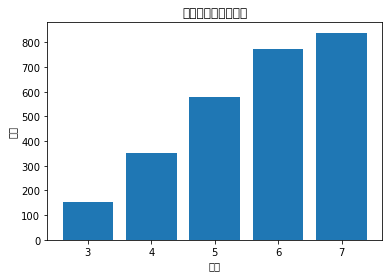

In [20]:
#每种等级的数量
lv_value = stone["等级"].value_counts()
print(lv_value)
plt.bar(stone["等级"].unique(),lv_value)
plt.xlabel("等级")
plt.ylabel("数量")
plt.title("每个等级的护石数量")
plt.show()

等级
7    80
6    11
5     7
4     0
3     0
Name: value, dtype: int64


/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0, flags=flags)


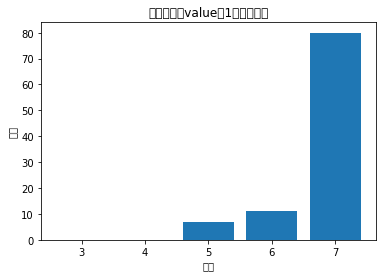

In [21]:
#每种等级中value为1的数量
lv_value2 = stone.groupby('等级')["value"].sum().iloc[::-1]
print(lv_value2)
#绘制
plt.bar(stone["等级"].unique(),lv_value2)
plt.xlabel("等级")
plt.ylabel("数量")
plt.title("每个等级中value为1的护石数量")
plt.show()

In [22]:
#比较每个等级中value为1的占比
temp= lv_value2 / lv_value
temp

3    0.000000
4    0.000000
5    0.009032
6    0.019031
7    0.095352
dtype: float64

value与技能的关系

In [23]:
stone[['一技能']].describe()

,一技能
count,2700.000000
mean,57.491481
std,29.750044
min,1.000000
25%,33.000000
50%,61.000000
75%,80.000000
max,109.000000


/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-p

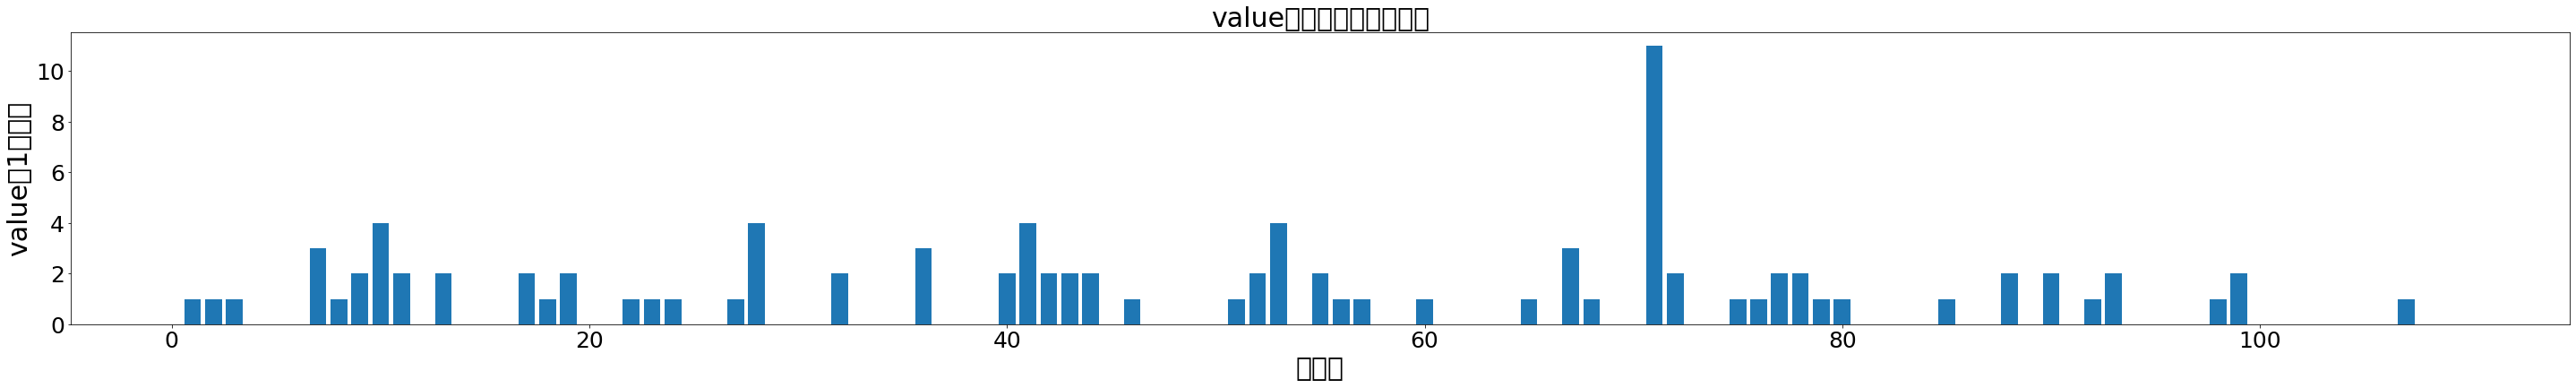

In [24]:
stone.groupby('一技能')['value'].sum()
plt.figure(figsize = (50,6))
plt.bar(stone["一技能"].unique(),stone.groupby('一技能')['value'].sum())
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
plt.title("value与一技能之间的关系",fontsize = 30)
plt.xlabel("一技能",fontsize = 30)
plt.ylabel("value为1的数量",fontsize = 30)
plt.show()

In [25]:
stone[['二技能']].describe()

,二技能
count,2700.000000
mean,62.566296
std,33.031838
min,1.000000
25%,39.000000
50%,64.000000
75%,90.000000
max,113.000000


/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-p

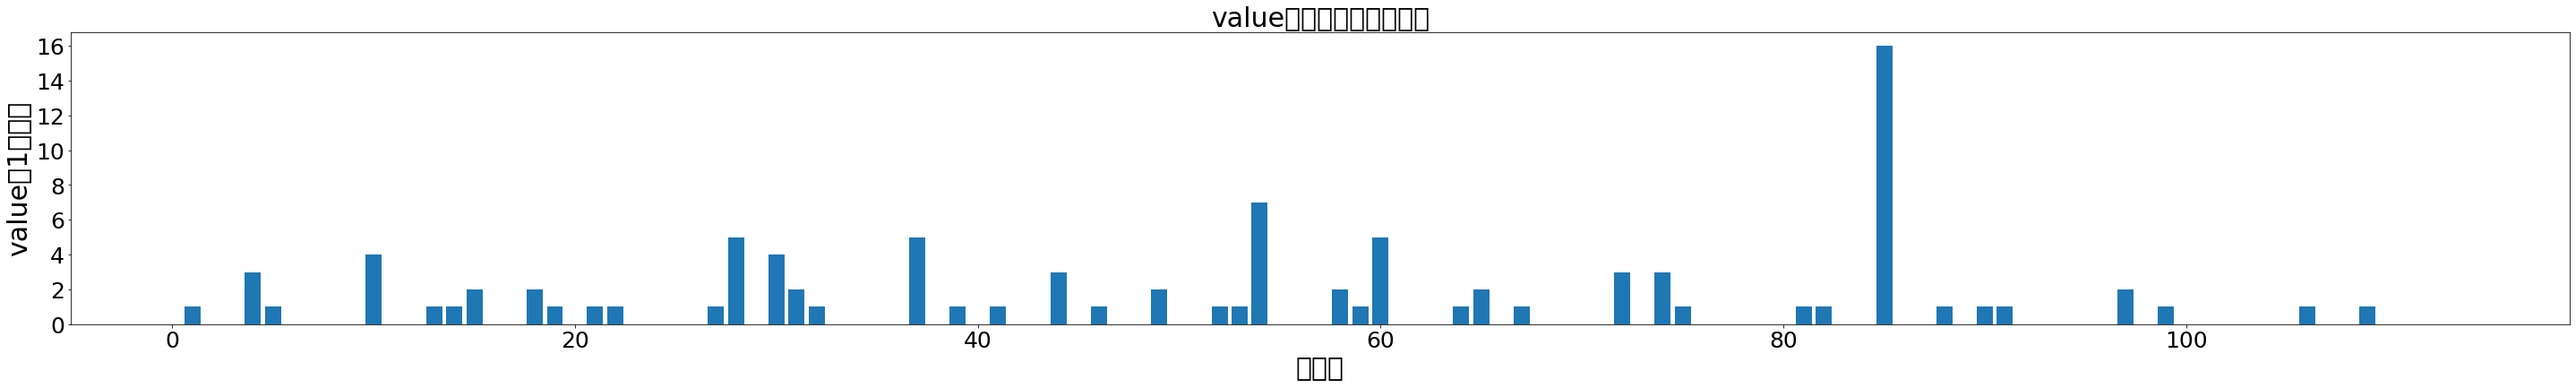

In [26]:
stone.groupby('二技能')['value'].sum()
plt.figure(figsize = (50,6))
plt.bar(stone["二技能"].unique(),stone.groupby('二技能')['value'].sum())
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
plt.title("value与二技能之间的关系",fontsize = 30)
plt.xlabel("二技能",fontsize = 30)
plt.ylabel("value为1的数量",fontsize = 30)
plt.show()

孔与value的关系

/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tangchar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 23380 missing from current font.
  font.set_text(s, 0, flags=flags)


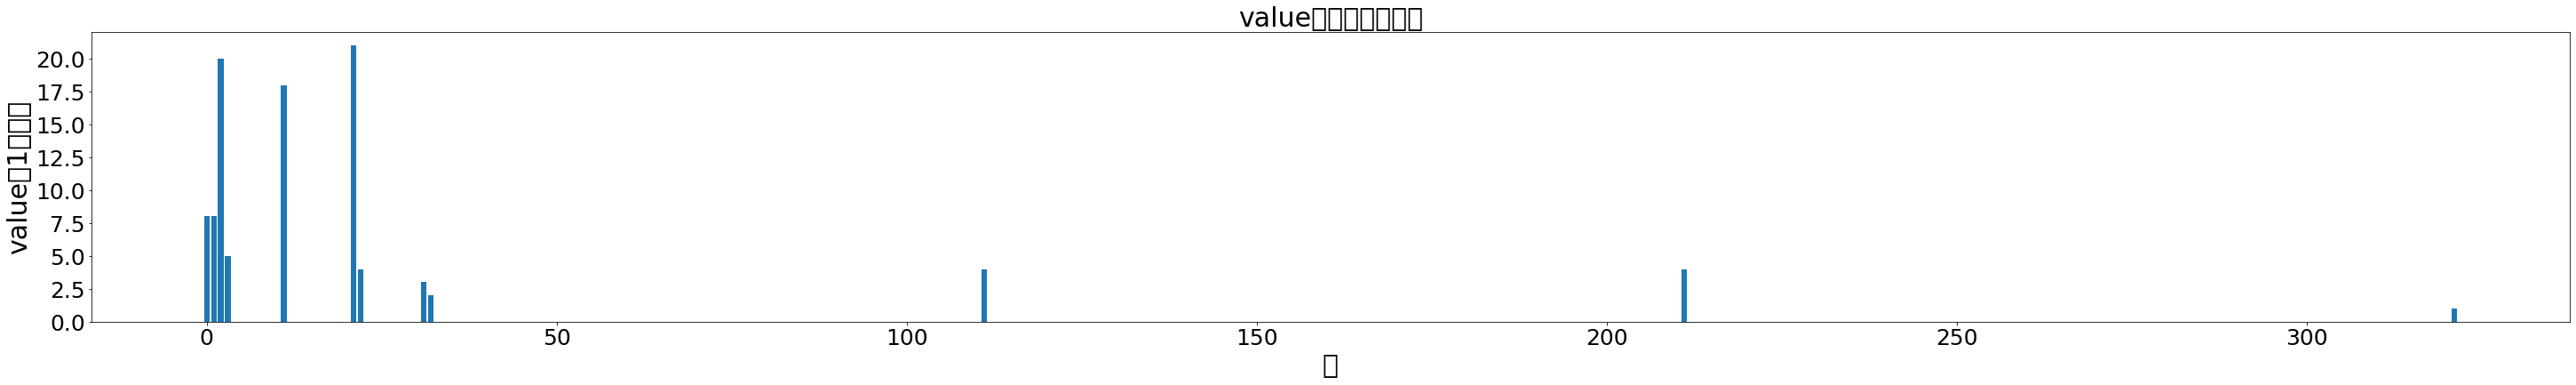

In [27]:
stone.groupby('孔')['value'].sum()
plt.figure(figsize = (50,6))
plt.bar(stone["孔"].unique(),stone.groupby('孔')['value'].sum())
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
plt.title("value与孔之间的关系",fontsize = 30)
plt.xlabel("孔",fontsize = 30)
plt.ylabel("value为1的数量",fontsize = 30)
plt.show()

## 包导入和训练数据的处理

In [28]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

target = 'value'
x_columns=[x for x in stone.columns if x not in [target]]
X = stone[x_columns]
Y = stone['value']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1620, 6), (1620,), (1080, 6), (1080,))

# 预测模型 rbf svm

In [29]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(x_train,y_train)
prediction1=model.predict(x_test)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is 0.9611111111111111


# 预测模型 Linear svm

In [30]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(x_train,y_train)
prediction2=model.predict(x_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test))

Accuracy for linear SVM is 0.9611111111111111


## 预测模型 Logistic Regression

In [31]:
model = LogisticRegression()
model.fit(x_train,y_train)
prediction3=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.9611111111111111


## 预测模型 DecisionTree Classifier

In [32]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction4=model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.9574074074074074


## 预测模型 KNeighborsClassifier

In [33]:
model=KNeighborsClassifier() 
model.fit(x_train,y_train)
prediction5=model.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.9601851851851851


# 预测模型 KNN

/var/folders/sc/2kppsf2j0f75mzm7lk5b1y2r0000gn/T/ipykernel_65964/2150877265.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


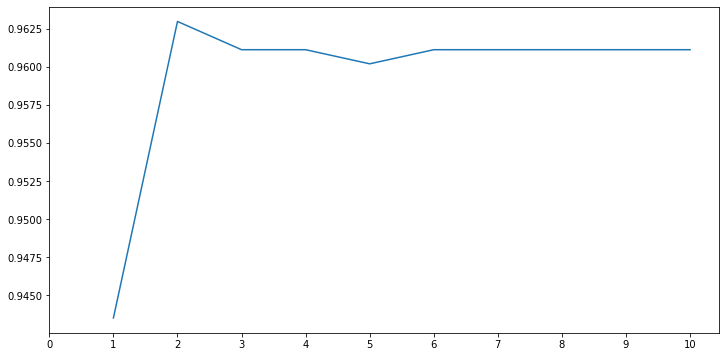

Accuracies for different values of n are: [0.94351852 0.96296296 0.96111111 0.96111111 0.96018519 0.96111111
 0.96111111 0.96111111 0.96111111 0.96111111] 
with the max value as  0.9629629629629629


In [34]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'\nwith the max value as ',a.values.max())

## 预测模型 高斯

In [35]:
model=GaussianNB()
model.fit(x_train,y_train)
prediction6=model.predict(x_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.9361111111111111


## 预测模型 随机森林

In [36]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prediction7=model.predict(x_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))

The accuracy of the Random Forests is 0.9629629629629629


## Cross Validation

In [37]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
# from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

NameError: name 'accuracy' is not defined

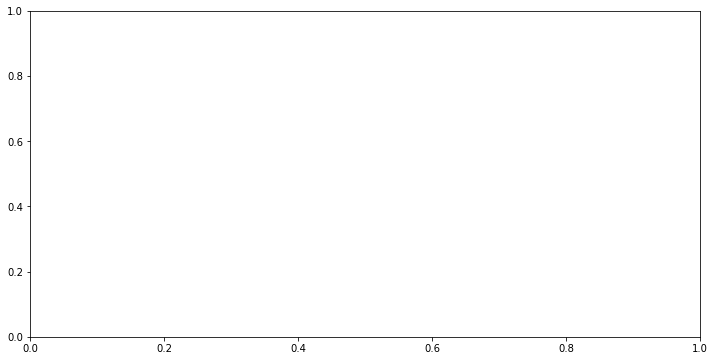

In [38]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f',cmap='coolwarm')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f',cmap='coolwarm')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f',cmap='coolwarm')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f',cmap='coolwarm')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.3,wspace=0.5)
plt.show()